# Data

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Survey Data
athena_survey = pd.read_csv("athena_survey_data.csv")
athena_survey

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,freq.customize,freq.test.world,gg.game.presented,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
0,male,IN,19,20000,4,7,5,7,5,3,...,3,1,Warrior Guild,42.0,2,3,6,4,1,5
1,male,OR,29,80000,5,7,1,4,2,4,...,1,3,Warrior Guild,59.0,3,1,6,4,2,5
2,male,MN,52,91000,4,3,3,4,5,7,...,2,3,Seraph Guardians,74.0,4,1,3,5,6,2
3,female,FL,20,24000,7,3,3,6,5,4,...,2,3,Warrior Guild,38.0,3,1,4,2,5,6
4,female,NM,33,64000,7,6,1,7,1,2,...,1,3,Evercrest,42.0,3,2,5,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,2,5,Evercrest,44.0,1,2,5,3,4,6
2174,male,NY,42,118000,3,7,3,3,6,3,...,1,1,Evercrest,75.0,6,1,3,5,4,2
2175,female,MO,52,97000,6,5,1,5,3,2,...,2,3,Evercrest,63.0,4,2,6,3,1,5
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,2,2,Seraph Guardians,28.0,2,4,6,1,3,5


# PCA Analysis

In [3]:
attributes = athena_survey.iloc[:, 4:44]
attributes

,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,imp.mastery,imp.backstory,imp.dominate,imp.completion,...,enj.guns,enj.gore,enj.blow.up,freq.explore,freq.experiment,freq.study,freq.char.creation,freq.stats,freq.customize,freq.test.world
0,4,7,5,7,5,3,3,2,5,6,...,1,1,2,1,2,4,4,4,3,1
1,5,7,1,4,2,4,5,3,4,6,...,5,5,4,4,4,3,1,3,1,3
2,4,3,3,4,5,7,3,7,1,5,...,2,4,4,3,5,4,3,4,2,3
3,7,3,3,6,5,4,7,3,6,2,...,2,1,4,4,2,7,2,1,2,3
4,7,6,1,7,1,2,7,1,2,7,...,4,1,4,3,3,7,2,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,5,3,1,5,3,3,4,4,4,4,...,2,2,1,7,4,5,1,3,2,5
2174,3,7,3,3,6,3,4,3,2,7,...,1,2,1,1,2,1,1,3,1,1
2175,6,5,1,5,3,2,6,1,3,4,...,4,2,4,6,4,5,1,3,2,3
2176,2,4,4,1,2,1,2,1,5,3,...,6,6,5,2,1,5,2,6,2,2


In [4]:
# Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(attributes)
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(attributes)
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.8903064302758804


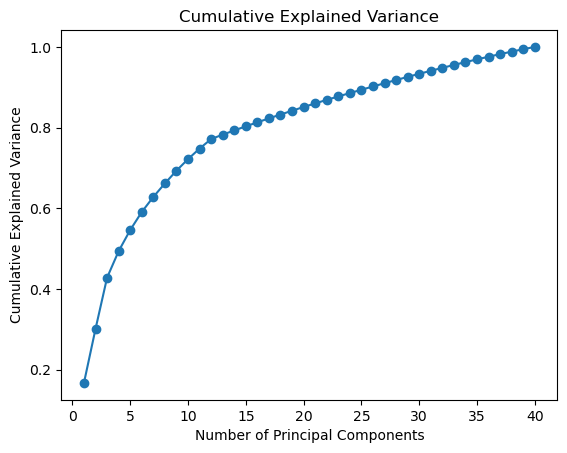

array([6.6930014 , 5.35042033, 5.08654204, 2.63196852, 2.09323499,
       1.79060433, 1.49185008, 1.34244474, 1.26272407, 1.14607329,
       1.04575203, 0.9461203 , 0.43730903, 0.41672851, 0.40923929,
       0.39558531, 0.39151915, 0.37984153, 0.37767606, 0.37204413,
       0.35662305, 0.3502892 , 0.33996429, 0.33292758, 0.32947343,
       0.32751998, 0.32053907, 0.31765556, 0.31178708, 0.30282288,
       0.29923353, 0.29216912, 0.28939193, 0.28204642, 0.2716738 ,
       0.26252222, 0.25701791, 0.24804166, 0.24196581, 0.22403024])

In [5]:
# Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(attributes)

# Create and fit the PCA model
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain 
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

In [6]:
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

fa = FactorAnalysis(n_components=11)
fa.fit(attributes)
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, index=attributes.columns)

Rotated Factor Loadings:


,0,1,2,3,4,5,6,7,8,9,10
imp.challenge,-0.180142,0.039865,1.122828,-0.241394,0.220638,0.011740,0.094357,0.014641,-0.072129,0.053535,0.009130
imp.unlocks,-0.006976,1.415220,-0.181069,-0.252737,-0.120320,0.294503,0.161056,0.405373,-0.017512,0.065483,-0.298064
imp.customize,0.342375,0.020624,-0.023289,-0.159119,0.181993,-0.015983,-0.156872,-0.074076,1.212812,0.118343,0.078130
imp.difficulty,-0.168373,0.059778,1.109269,-0.221726,0.210359,0.029073,0.138681,0.011996,-0.074451,0.026525,0.020573
imp.characters,0.548020,-0.136649,-0.092196,0.071915,0.140745,-0.055465,-1.417793,-0.008489,0.177397,0.117690,-0.080807
imp.storyline,0.577476,-0.147135,-0.059355,0.096848,0.159139,-0.088142,-1.367779,-0.016939,0.234650,0.079980,-0.127881
imp.mastery,-0.042897,-0.028480,1.329487,-0.146521,0.215237,-0.029180,0.046793,-0.034507,-0.007526,-0.003252,-0.014202
imp.backstory,0.559238,-0.124916,-0.109307,0.072062,0.148942,-0.020227,-1.439119,-0.020410,0.213054,0.042506,-0.114582
imp.dominate,-0.039640,-0.195107,-0.012673,0.063595,0.095343,-0.224576,0.079253,-0.283560,0.071952,0.140501,1.099722
imp.completion,-0.048460,1.484717,-0.180764,-0.228323,-0.122179,0.262128,0.097806,0.362387,0.003855,0.069797,-0.269883


In [7]:
#Naming the factors based on Loadings
factor_scores = fa.transform(athena_survey.iloc[:, 4:44])
athena_survey['immersion'] = factor_scores[:,0]
athena_survey['completion'] = factor_scores[:,1]
athena_survey['mastery'] = factor_scores[:,2]
athena_survey['destruction'] = factor_scores[:,3]
athena_survey['discovery'] = factor_scores[:,4]
athena_survey['slow-paced'] = factor_scores[:,5]
athena_survey['anti-story'] = factor_scores[:,6]
athena_survey['independent'] = factor_scores[:,7]
athena_survey['design'] = factor_scores[:,8]
athena_survey['power'] = factor_scores[:,9]
athena_survey['competition'] = factor_scores[:,10]

In [8]:
athena_survey

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,completion,mastery,destruction,discovery,slow-paced,anti-story,independent,design,power,competition
0,male,IN,19,20000,4,7,5,7,5,3,...,1.026364,0.288048,-1.729673,0.357409,-0.963969,-1.162028,-0.485350,-0.701280,0.038267,-0.782520
1,male,OR,29,80000,5,7,1,4,2,4,...,0.281517,0.265973,0.511767,1.797573,0.447245,1.326598,-0.509856,-1.462627,-0.012185,0.664470
2,male,MN,52,91000,4,3,3,4,5,7,...,0.766026,-1.134274,0.021440,-1.152185,1.285079,1.084611,0.016739,0.248936,0.381897,-0.548716
3,female,FL,20,24000,7,3,3,6,5,4,...,-0.713598,1.772122,-0.728340,-1.438209,-0.009663,1.168443,-1.161077,-0.663334,0.033816,1.481820
4,female,NM,33,64000,7,6,1,7,1,2,...,0.796273,1.774701,0.887970,-0.011490,-0.443397,1.204327,-0.568388,0.153578,-0.193657,-0.614089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,-0.173302,1.510871,-0.522735,-0.294560,1.394743,-0.956846,1.029747,-1.065428,0.365529,-0.770932
2174,male,NY,42,118000,3,7,3,3,6,3,...,2.006702,-0.024141,-0.766418,-1.193741,0.371252,-0.097776,0.007307,-0.865607,0.145686,-0.281216
2175,female,MO,52,97000,6,5,1,5,3,2,...,0.478313,1.776541,1.109982,-0.052906,0.820951,-0.160649,1.153390,0.339596,0.004468,0.383724
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,-1.351344,0.305298,-0.460080,1.042206,-0.791047,0.868674,0.424166,0.966661,1.237172,-0.098171


# K-Means Clustering

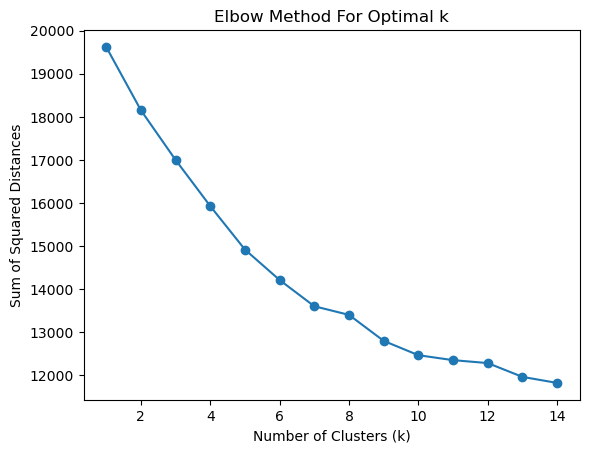

In [9]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(athena_survey.iloc[:,52:])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

/var/folders/9m/wmj2q34s7878hsxw7zr_zw4c0000gn/T/ipykernel_10826/311732721.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


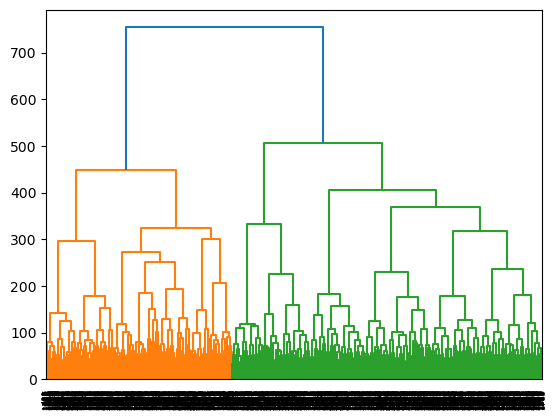

In [10]:
# Determine the number of clusters
# dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(athena_survey.iloc[:,52:], metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=6, random_state=1, n_init='auto')

# Add a new column with cluster assignment for each person
athena_survey['Cluster'] = kmeans.fit_predict(athena_survey.iloc[:,52:])
athena_survey

,gender,state,age,income,imp.challenge,imp.unlocks,imp.customize,imp.difficulty,imp.characters,imp.storyline,...,mastery,destruction,discovery,slow-paced,anti-story,independent,design,power,competition,Cluster
0,male,IN,19,20000,4,7,5,7,5,3,...,0.288048,-1.729673,0.357409,-0.963969,-1.162028,-0.485350,-0.701280,0.038267,-0.782520,3
1,male,OR,29,80000,5,7,1,4,2,4,...,0.265973,0.511767,1.797573,0.447245,1.326598,-0.509856,-1.462627,-0.012185,0.664470,4
2,male,MN,52,91000,4,3,3,4,5,7,...,-1.134274,0.021440,-1.152185,1.285079,1.084611,0.016739,0.248936,0.381897,-0.548716,0
3,female,FL,20,24000,7,3,3,6,5,4,...,1.772122,-0.728340,-1.438209,-0.009663,1.168443,-1.161077,-0.663334,0.033816,1.481820,5
4,female,NM,33,64000,7,6,1,7,1,2,...,1.774701,0.887970,-0.011490,-0.443397,1.204327,-0.568388,0.153578,-0.193657,-0.614089,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,male,MA,28,54000,5,3,1,5,3,3,...,1.510871,-0.522735,-0.294560,1.394743,-0.956846,1.029747,-1.065428,0.365529,-0.770932,5
2174,male,NY,42,118000,3,7,3,3,6,3,...,-0.024141,-0.766418,-1.193741,0.371252,-0.097776,0.007307,-0.865607,0.145686,-0.281216,3
2175,female,MO,52,97000,6,5,1,5,3,2,...,1.776541,1.109982,-0.052906,0.820951,-0.160649,1.153390,0.339596,0.004468,0.383724,5
2176,nonbinary,TX,22,33000,2,4,4,1,2,1,...,0.305298,-0.460080,1.042206,-0.791047,0.868674,0.424166,0.966661,1.237172,-0.098171,4


In [12]:
print("Cluster Centers:")
pd.DataFrame(kmeans.cluster_centers_, columns=athena_survey.columns[52:-1], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

Cluster Centers:


,immersion,completion,mastery,destruction,discovery,slow-paced,anti-story,independent,design,power,competition
Cluster 0,0.976057,-0.480305,-0.184773,-0.656854,-0.583187,0.630404,-0.037958,-0.299348,0.023048,-0.074886,-0.066671
Cluster 1,1.003993,0.842669,-0.376211,0.401677,0.369084,-0.299508,-0.064432,0.224068,0.009590,0.134922,-0.079257
Cluster 2,-0.647232,-0.541538,-0.838231,1.077812,-0.517299,-0.098144,-0.096283,-0.113110,-0.120711,-0.081487,0.056660
Cluster 3,-0.988685,0.899465,-0.217874,-0.813469,0.097097,-0.096869,-0.108100,-0.177363,0.123370,-0.088575,0.023334
Cluster 4,-0.398947,-1.099709,-0.242154,-0.406292,1.093791,-0.062678,0.086609,0.130387,-0.148695,0.021834,0.120907
Cluster 5,-0.247630,-0.018197,1.340073,0.254892,-0.252474,-0.043386,0.178133,0.158030,0.053366,0.043836,-0.005354


In [13]:
#Renaming the Clusters based on centers
athena_survey['Cluster'] = kmeans.fit_predict(athena_survey.iloc[:, 52:-1])
athena_survey['Cluster'] = athena_survey['Cluster'].replace({0: 'Slayer', 1: 'Bounty Hunter', 2: 'Skirmisher', 3: 'Gardener', 4: 'Acrobat', 5: 'Architect'})

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)    
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected
    
    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [15]:
#Some characteristics of Clusters
cluster_averages = athena_survey.groupby('Cluster')[['age', 'income']].mean()
gender_ct = pd.crosstab(athena_survey['Cluster'], athena_survey['gender'])

print("Cluster Averages (Age and Income):")
print(cluster_averages)
print("\nGender Distribution:")
print(gender_ct)

Cluster Averages (Age and Income):
                     age        income
Cluster                               
Acrobat        20.841727  28374.100719
Architect      29.006397  57848.614072
Bounty Hunter  33.689904  62608.173077
Gardener       28.574780  53173.020528
Skirmisher     28.476190  57625.396825
Slayer         23.518106  38523.676880

Gender Distribution:
gender         female  male  nonbinary
Cluster                               
Acrobat            98   179          1
Architect         187   279          3
Bounty Hunter     215   198          3
Gardener          195   142          4
Skirmisher        122   189          4
Slayer            184   175          0


# Game Pricing and Revenue Calculations

In [16]:
wtp_data = athena_survey[['gg.game.presented','gg.maxprice']]
pricing_warriorguild = wtp_data[wtp_data['gg.game.presented'] == 'Warrior Guild']
pricing_seraphguardians = wtp_data[wtp_data['gg.game.presented'] == 'Seraph Guardians']
pricing_evercrest = wtp_data[wtp_data['gg.game.presented'] == 'Evercrest']

In [17]:
def wtp_calculator(df):
    df = df.dropna()  # Remove NaNs

    cumulative_wtp = pd.DataFrame(columns=['price', 'per_customers_wtp', 'pred_revenue'])

    if df.empty:
        return cumulative_wtp  # Return empty DataFrame if all values were NaN

    for price in np.arange(10, 100, 1):
        num_respondents_wtp = sum(df >= price)
        cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
            'price': [price],
            'per_customers_wtp': [num_respondents_wtp / len(df)],
            'pred_revenue': [num_respondents_wtp * price]
        })], ignore_index=True)

    return cumulative_wtp

In [18]:
cumulative_wtp_warriorguild = wtp_calculator(pricing_warriorguild['gg.maxprice'])
cumulative_wtp_seraphguardians = wtp_calculator(pricing_seraphguardians['gg.maxprice'])
cumulative_wtp_evercrest = wtp_calculator(pricing_evercrest['gg.maxprice'])

/var/folders/9m/wmj2q34s7878hsxw7zr_zw4c0000gn/T/ipykernel_10826/3308966895.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
/var/folders/9m/wmj2q34s7878hsxw7zr_zw4c0000gn/T/ipykernel_10826/3308966895.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({
/var/folders/9m/wmj2q34s7878hsxw7zr_zw4c0000gn/T/ipykernel_10826/3308966895.py:11: FutureWarning: The behavior of DataFrame 

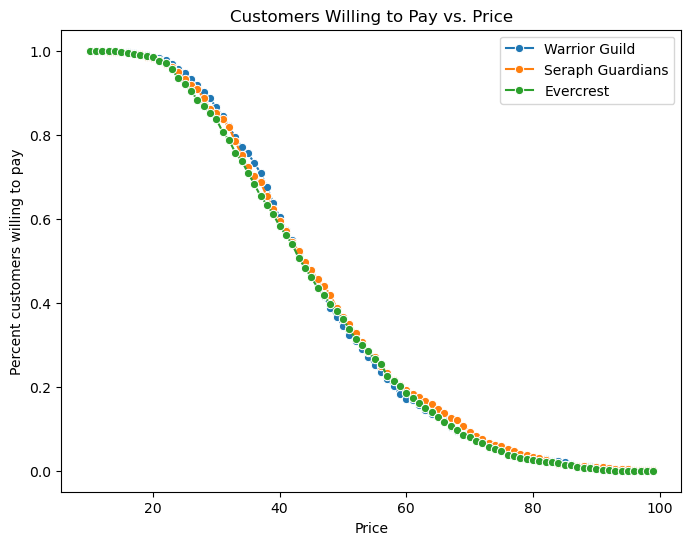

In [19]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp_warriorguild, marker='o', label='Warrior Guild')
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp_seraphguardians, marker='o', label='Seraph Guardians')
sns.lineplot(x='price', y='per_customers_wtp', data=cumulative_wtp_evercrest, marker='o', label='Evercrest')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Customers Willing to Pay vs. Price')
plt.show()

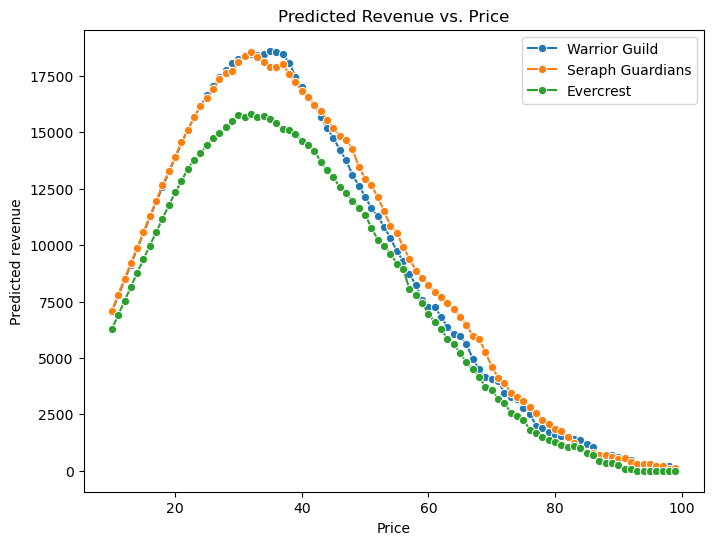

In [20]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp_warriorguild, marker='o', label='Warrior Guild')
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp_seraphguardians, marker='o', label='Seraph Guardians')
sns.lineplot(x='price', y='pred_revenue', data=cumulative_wtp_evercrest, marker='o', label='Evercrest')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [21]:
print(cumulative_wtp_warriorguild[cumulative_wtp_warriorguild['pred_revenue'] == max(cumulative_wtp_warriorguild['pred_revenue'])])
print(cumulative_wtp_seraphguardians[cumulative_wtp_seraphguardians['pred_revenue'] == max(cumulative_wtp_seraphguardians['pred_revenue'])])
print(cumulative_wtp_evercrest[cumulative_wtp_evercrest['pred_revenue'] == max(cumulative_wtp_evercrest['pred_revenue'])])

   price  per_customers_wtp pred_revenue
25    35           0.755682        18620
   price  per_customers_wtp pred_revenue
22    32           0.818054        18560
   price  per_customers_wtp pred_revenue
22    32           0.787879        15808


# Willingness to Pay by Clusters

In [22]:
athena_survey_cleaned = athena_survey.dropna(subset=['gg.maxprice'])
def run_regression(game_name):
    # Filter data for the specific game
    game_data = athena_survey_cleaned[athena_survey_cleaned['gg.game.presented'] == game_name]
    
    # Convert 'Cluster' column into dummy variables (drop first category)
    attributes = pd.get_dummies(game_data['Cluster'], drop_first=True).astype(float)

    # Define dependent variable
    y = game_data['gg.maxprice']

    # Add constant for intercept
    X = sm.add_constant(attributes)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print summary
    print(f"\n--- Regression Results for {game_name} ---\n")
    print(model.summary())

In [23]:
run_regression('Warrior Guild')
run_regression('Seraph Guardians')
run_regression('Evercrest')


--- Regression Results for Warrior Guild ---

                            OLS Regression Results                            
Dep. Variable:            gg.maxprice   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     13.45
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.52e-12
Time:                        01:05:21   Log-Likelihood:                -2891.7
No. Observations:                 704   AIC:                             5795.
Df Residuals:                     698   BIC:                             5823.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

# Acquiring Seraph Guardian

In [24]:
athena_survey.groupby('Cluster')[athena_survey.columns[45:52]].mean()

,gg.maxprice,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
Cluster,,,,,,,
Acrobat,34.888087,1.769784,3.820144,4.205036,1.705036,4.996403,4.503597
Architect,48.290023,3.040512,1.831557,4.631130,3.302772,2.995736,5.198294
Bounty Hunter,52.957784,4.822115,1.242788,3.348558,5.346154,4.081731,2.158654
Gardener,43.261006,3.563050,1.422287,5.026393,4.510264,3.551320,2.926686
Skirmisher,46.319298,3.241270,2.003175,4.523810,2.104762,4.787302,4.339683
Slayer,43.571429,3.178273,2.649025,1.771588,3.554318,5.771588,4.075209


In [25]:
seraph_newpricing = wtp_calculator(athena_survey[athena_survey['rank.SeraphGuardians'] == 1]['gg.maxprice'])

/var/folders/9m/wmj2q34s7878hsxw7zr_zw4c0000gn/T/ipykernel_10826/3308966895.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_wtp = pd.concat([cumulative_wtp, pd.DataFrame({


In [26]:
print(seraph_newpricing[seraph_newpricing['pred_revenue'] == max(seraph_newpricing['pred_revenue'])])

   price  per_customers_wtp pred_revenue
27    37           0.784785        29008


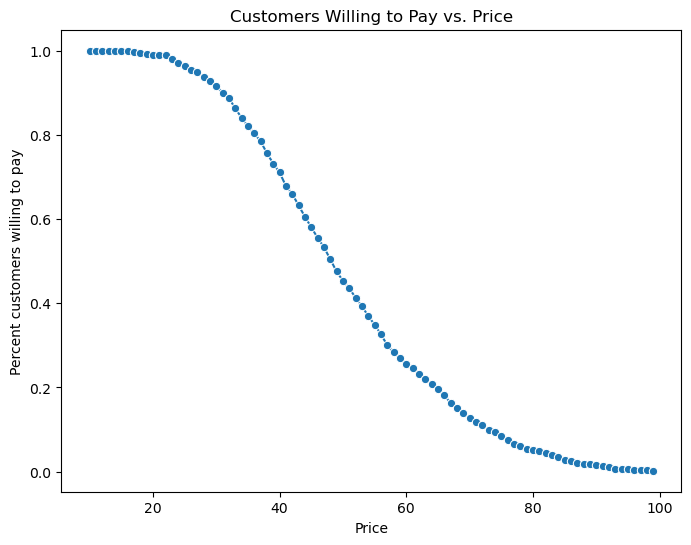

In [27]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='per_customers_wtp', data=seraph_newpricing, marker='o')
plt.xlabel('Price')
plt.ylabel('Percent customers willing to pay')
plt.title('Customers Willing to Pay vs. Price')
plt.show()

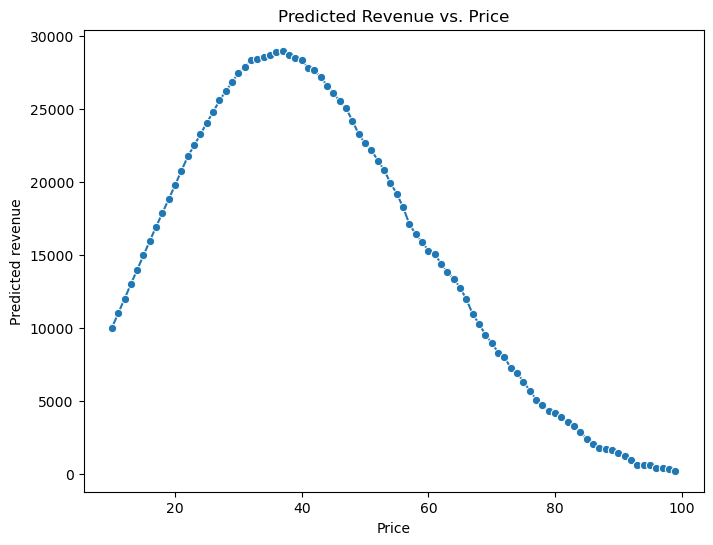

In [28]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='price', y='pred_revenue', data=seraph_newpricing, marker='o')
plt.xlabel('Price')
plt.ylabel('Predicted revenue')
plt.title('Predicted Revenue vs. Price')
plt.show()

In [29]:
athena_survey[athena_survey['gg.maxprice'] >= 37].groupby('Cluster')[athena_survey.columns[46:52]].apply(lambda x: (x == 1).sum())

,rank.WarriorGuild,rank.SeraphGuardians,rank.Evercrest,rank.DevilsGate,rank.Marksman,rank.QuestoftheTitan
Cluster,,,,,,
Acrobat,43,8,1,53,0,3
Architect,60,207,1,37,28,0
Bounty Hunter,1,249,7,1,1,57
Gardener,17,156,0,4,5,22
Skirmisher,13,96,1,91,0,2
Slayer,28,68,124,9,0,3
